In [ ]:
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.layers import Dense,Input,LSTM,GlobalMaxPooling1D,Dropout, Flatten, Conv2D, BatchNormalization, MaxPooling2D
from tensorflow.keras.models import Model

In [ ]:
!wget https://lazyprogrammer.me/course_files/fer2013.csv

--2022-09-22 15:37:18--  https://lazyprogrammer.me/course_files/fer2013.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 301072766 (287M) [text/csv]
Saving to: ‘fer2013.csv.4’

fer2013.csv.4       100%[===================>] 287.12M   107MB/s    in 2.7s    

2022-09-22 15:37:21 (107 MB/s) - ‘fer2013.csv.4’ saved [301072766/301072766]



In [ ]:
df = pd.read_csv('fer2013.csv')

# 48x48 gray scale

In [ ]:
emotions = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}

In [ ]:
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [ ]:
df['Usage'].unique()

array(['Training', 'PublicTest', 'PrivateTest'], dtype=object)

In [ ]:
K=len(df['emotion'].unique())

In [ ]:
df_train = df[df['Usage']=='Training']
df_test = df[df['Usage']=='PrivateTest']

In [ ]:
x_train = df_train['pixels'].to_numpy()
x_test = df_test['pixels'].to_numpy()

y_train = df_train['emotion'].to_numpy()
y_test = df_test['emotion'].to_numpy()


In [ ]:
x_train.shape, x_test.shape

((28709,), (3589,))

In [ ]:
def convert_to_array(input):
  i = 0
  ret = []
  for x in input:
      ret.append(np.fromstring(x, dtype=int, sep=' '))
      i+=1
  return ret


In [ ]:
x_train=np.array(convert_to_array(x_train))
x_test=np.array(convert_to_array(x_test))

In [ ]:
x_train = x_train.reshape(-1,48,48)
x_test = x_test.reshape(-1,48,48)

In [ ]:
x_train.shape, x_test.shape

((28709, 48, 48), (3589, 48, 48))

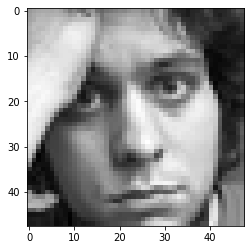

In [ ]:
plt.imshow(x_train[500],cmap='gray')

In [ ]:
R,C = x_train[0].shape
R,C

(48, 48)

In [ ]:
x_train, x_test = x_train/255.0,x_test/255.0

In [ ]:
x_train=np.expand_dims(x_train, -1)
x_test=np.expand_dims(x_test, -1)

In [ ]:
i = Input(shape=x_train[0].shape)

x=Conv2D(32,(3,3),activation='relu',padding='same')(i)
x=BatchNormalization()(x)
x=Conv2D(32,(3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)
x=MaxPooling2D((2,2))(x)


x=Conv2D(64,(3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)
x=Conv2D(64,(3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)
x=MaxPooling2D((2,2))(x)


x=Conv2D(128,(3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)
x=Conv2D(128,(3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)
x=MaxPooling2D((2,2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512,activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(512,activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K,activation='softmax')(x)


model = Model(i,x)

In [ ]:
model.compile(optimizer='adam',
        loss='sparse_categorical_crossentropy',  
        metrics=['accuracy'])

In [ ]:
r=model.fit(x_train, y_train,
                    validation_data=(x_test,y_test),
                    epochs=15)

Epoch 1/15
898/898 [==============================] - 13s 11ms/step - loss: 1.7098 - accuracy: 0.3382 - val_loss: 1.4906 - val_accuracy: 0.4140
Epoch 2/15
898/898 [==============================] - 10s 11ms/step - loss: 1.3902 - accuracy: 0.4615 - val_loss: 1.3200 - val_accuracy: 0.4987
Epoch 3/15
898/898 [==============================] - 10s 11ms/step - loss: 1.2576 - accuracy: 0.5169 - val_loss: 1.3232 - val_accuracy: 0.4923
Epoch 4/15
898/898 [==============================] - 10s 11ms/step - loss: 1.1838 - accuracy: 0.5474 - val_loss: 1.1850 - val_accuracy: 0.5461
Epoch 5/15
898/898 [==============================] - 10s 11ms/step - loss: 1.1054 - accuracy: 0.5841 - val_loss: 1.1468 - val_accuracy: 0.5698
Epoch 6/15
898/898 [==============================] - 9s 11ms/step - loss: 1.0414 - accuracy: 0.6096 - val_loss: 1.1261 - val_accuracy: 0.5759
Epoch 7/15
898/898 [==============================] - 9s 11ms/step - loss: 0.9846 - accuracy: 0.6332 - val_loss: 1.0661 - val_accuracy: 0

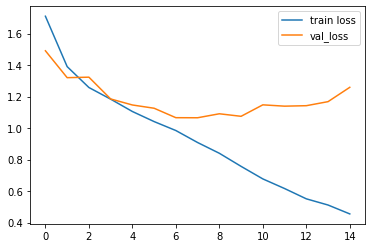

In [ ]:
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

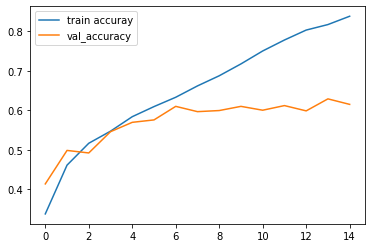

In [ ]:
plt.plot(r.history['accuracy'],label='train accuray')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()

Confusion matrix, without normalization
[[261   4  75  19  83   8  41]
 [ 14  30   5   1   2   2   1]
 [ 60   3 283  16  99  39  28]
 [ 31   0  38 706  41  21  42]
 [ 69   3 106  26 306   7  77]
 [ 14   1  73  22   9 286  11]
 [ 60   0  61  29 130  10 336]]


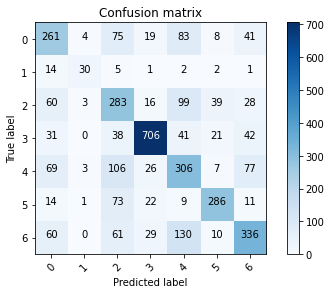

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm,classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  if normalize:
      cm=cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
  else: 
    print('Confusion matrix, without normalization')
  
  print(cm)

  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=45)
  plt.yticks(tick_marks,classes)
  fmt='.2f' if normalize else 'd'
  thresh=cm.max() /2.

  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i,format(cm[i,j],fmt),
             horizontalalignment="center",
             color="white" if cm[i,j]>thresh else "black")
    
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test=model.predict(x_test).argmax(axis=1)
cm=confusion_matrix(y_test,p_test)
plot_confusion_matrix(cm,list(range(K)))

In [ ]:
emotions

{0: 'Angry',
 1: 'Disgust',
 2: 'Fear',
 3: 'Happy',
 4: 'Sad',
 5: 'Surprise',
 6: 'Neutral'}

Text(0.5, 1.0, 'True label: Neutral Predicted Angry')

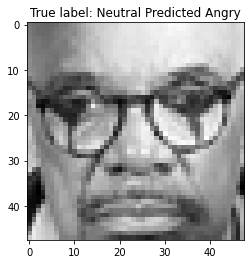

In [ ]:
misclassifies_idx=np.where(p_test !=y_test)[0]
i = np.random.choice(misclassifies_idx)
plt.imshow(x_test[i].reshape(48,48 ),cmap='gray')
plt.title("True label: %s Predicted %s" % (emotions[y_test[i]],emotions[p_test[i]]))

Proviamo usando il generator


In [ ]:
i = Input(shape=x_train[0].shape)

x=Conv2D(32,(3,3),activation='relu',padding='same')(i)
x=BatchNormalization()(x)
x=Conv2D(32,(3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)
x=MaxPooling2D((2,2))(x)


x=Conv2D(64,(3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)
x=Conv2D(64,(3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)
x=MaxPooling2D((2,2))(x)


x=Conv2D(128,(3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)
x=Conv2D(128,(3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)
x=MaxPooling2D((2,2))(x)


x=Conv2D(256,(3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)
x=Conv2D(256,(3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)
x=MaxPooling2D((2,2))(x)


x=Conv2D(512,(3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)
x=Conv2D(512,(3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)
x=MaxPooling2D((2,2))(x)


x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(256,activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(512,activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K,activation='softmax')(x)


model = Model(i,x)

In [ ]:
model.compile(optimizer='sgd',
        loss='sparse_categorical_crossentropy',  
        metrics=['accuracy'])


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
data_generator=ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)
batch_size=32
train_generator=data_generator.flow(x_train,y_train,batch_size)

In [ ]:
steps_per_epoch = x_train.shape[0] // batch_size

r = model.fit_generator(
    train_generator,
    validation_data=(x_test,y_test),
    steps_per_epoch=steps_per_epoch,
    epochs=50
)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


897/897 [==============================] - 18s 19ms/step - loss: 1.8289 - accuracy: 0.2519 - val_loss: 1.7124 - val_accuracy: 0.3051
Epoch 2/50
897/897 [==============================] - 17s 19ms/step - loss: 1.6534 - accuracy: 0.3370 - val_loss: 1.5955 - val_accuracy: 0.3773
Epoch 3/50
897/897 [==============================] - 17s 19ms/step - loss: 1.5270 - accuracy: 0.3996 - val_loss: 1.6001 - val_accuracy: 0.3842
Epoch 4/50
897/897 [==============================] - 17s 19ms/step - loss: 1.4346 - accuracy: 0.4442 - val_loss: 1.3512 - val_accuracy: 0.4706
Epoch 5/50
897/897 [==============================] - 17s 19ms/step - loss: 1.3493 - accuracy: 0.4776 - val_loss: 1.2424 - val_accuracy: 0.5202
Epoch 6/50
897/897 [==============================] - 17s 19ms/step - loss: 1.2874 - accuracy: 0.5066 - val_loss: 1.2489 - val_accuracy: 0.5274
Epoch 7/50
897/897 [==============================] - 17s 19ms/step - loss: 1.2291 - accuracy: 0.5260 - val_loss: 1.1639 - val_accuracy: 0.5561
Epo

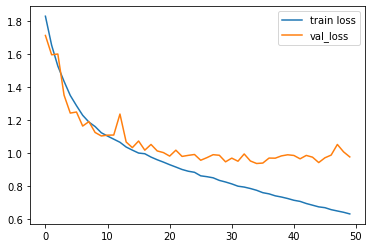

In [ ]:
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

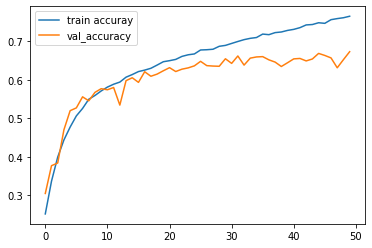

In [ ]:
plt.plot(r.history['accuracy'],label='train accuray')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()